# Experiment 2: Mode comparison

In [1]:
import os
import sys
# import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


sys.path.append('..')
from utils import load_yaml_config

In [42]:
def get_npy_metric(log_path, metric_name):
    arrs = []
    for subdir, dirs, files in os.walk(log_path):
        for file in files:
            filepath = subdir + os.sep + file

            if filepath.endswith(f"{metric_name}.npy"):
                arrs.append(np.load(filepath))
    return np.array(arrs)

def create_eval_results(path):
    eval_rewards = get_npy_metric(path, "eval_rewards")
    # Mean over independent runs
    y_t = np.mean(eval_rewards, axis=0)
    # Mean over testing environments
    if np.ndim(y_t) > 1:
        y = np.mean(y_t, axis=1)
        std = np.std(y, axis=1)
    else:
        y = y_t
        std = np.std(eval_rewards, axis=0)
    x = np.linspace(0, 3e6, len(y))

    return x, y, std

def get_runtime(path):
    runtime = get_npy_metric(path, "runtime")
    return np.mean(runtime, axis=0)

In [48]:
def get_npy_metric_minGRU(log_path, metric_name):
    arrs = []
    for subdir, dirs, files in os.walk(log_path):
        for file in files:
            filepath = subdir + os.sep + file

            if filepath.endswith(f"{metric_name}.npy"):
                arrs.append(np.load(filepath))
    return np.array(arrs)

def create_eval_results_minGRU(path):
    eval_rewards = np.squeeze(get_npy_metric_minGRU(path, "eval_rewards"))
    # print(eval_rewards.shape)
    # Mean over independent runs
    y_t = np.mean(eval_rewards, axis=-1)
    # print(y_t.shape)
    # Mean over testing environments
    if np.ndim(y_t) > 1:
        y = np.mean(y_t, axis=0)
        std = np.std(y_t, axis=0)
    else:
        y = y_t
        std = np.std(eval_rewards, axis=0)
    x = np.linspace(0, 3e6, len(y))

    return x, y, std

_, y, std = create_eval_results_minGRU("/home/tom/Documents/Master/Thesis/results/Experiment 2 minGRU/AutoencodeEasy/minGRU")
print(y.shape)
print(std.shape)

(45,)
(45,)


In [45]:
def get_config(log_path):
    for subdir, dirs, files in os.walk(log_path):
        for file in files:
            filepath = subdir + os.sep + file

            if filepath.endswith(f".yaml"):
                return load_yaml_config(filepath)

In [51]:
folder = "/home/tom/Documents/Master/Thesis/results/Experiment 2"

subfolders = [ f.path for f in os.scandir(folder) if f.is_dir() ]

def get_model_metrics(model):
    performance_dict = {}
    runtime_dict = {}
    for subfolder in subfolders:
        subsubfolders = [ f.path for f in os.scandir(subfolder) if f.is_dir() ]
        for subsubfolder in subsubfolders:
            model_name = os.path.basename(os.path.normpath(subsubfolder))
            environment_name = os.path.basename(os.path.normpath(subfolder))
            if model_name == model:
                performance_dict[environment_name] = create_eval_results(subsubfolder)
                runtime_dict[environment_name] = get_runtime(subsubfolder)
    return performance_dict, runtime_dict

s5_perf_dict, s5_runtime_dict = get_model_metrics("S5")
GRU_perf_dict, GRU_runtime_dict = get_model_metrics("GRU")
FF_perf_dict, FF_runtime_dict = get_model_metrics("FF")


In [50]:
folder = "/home/tom/Documents/Master/Thesis/results/Experiment 2 minGRU"

subfolders = [ f.path for f in os.scandir(folder) if f.is_dir() ]

def get_model_metrics_minGRU(model):
    performance_dict = {}
    runtime_dict = {}
    for subfolder in subfolders:
        subsubfolders = [ f.path for f in os.scandir(subfolder) if f.is_dir() ]
        for subsubfolder in subsubfolders:
            model_name = os.path.basename(os.path.normpath(subsubfolder))
            environment_name = os.path.basename(os.path.normpath(subfolder))
            if model_name == model:
                performance_dict[environment_name] = create_eval_results_minGRU(subsubfolder)
                runtime_dict[environment_name] = get_runtime(subsubfolder)
    return performance_dict, runtime_dict

minGRU_perf_dict, minGRU_runtime_dict = get_model_metrics_minGRU("minGRU")


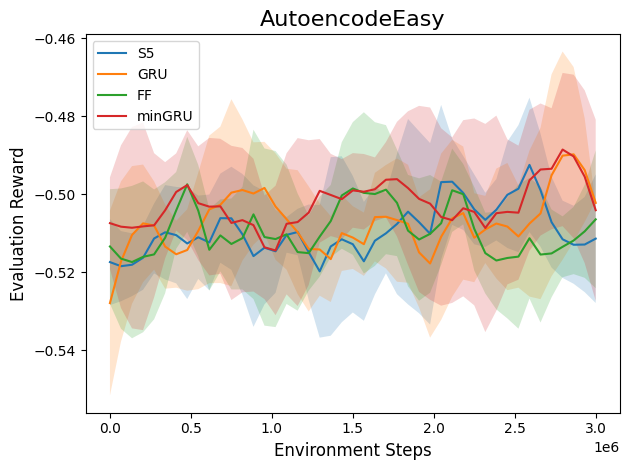

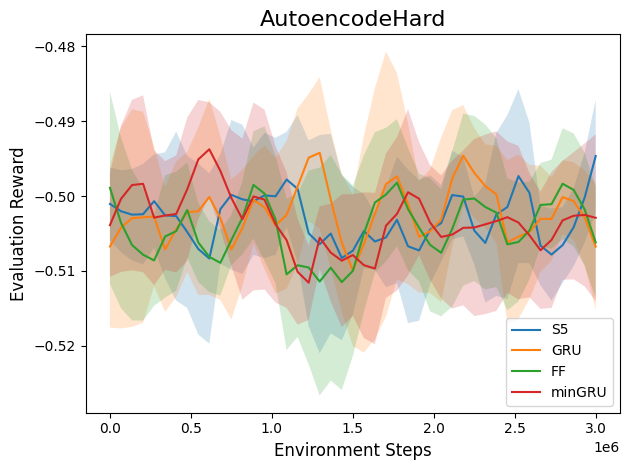

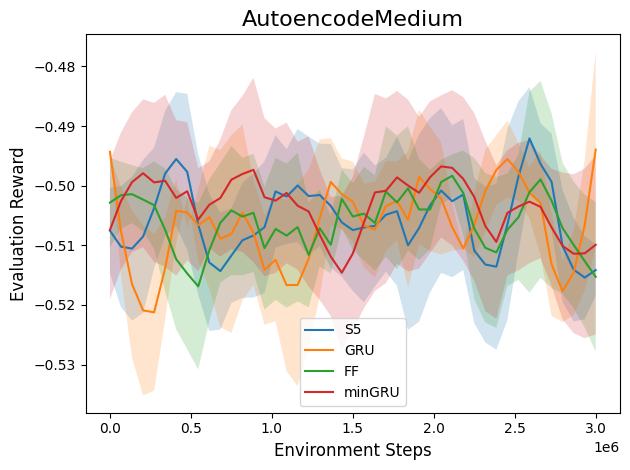

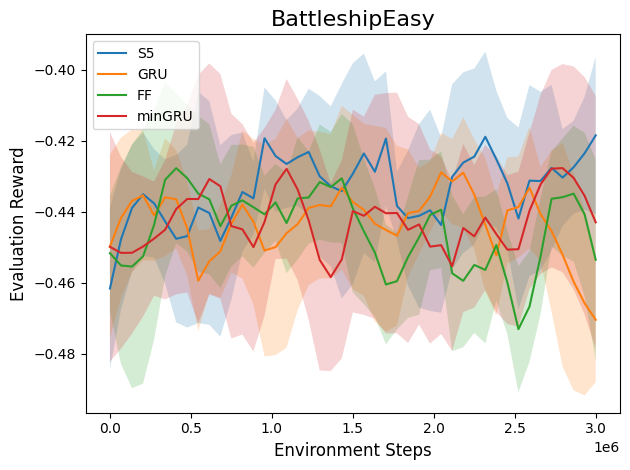

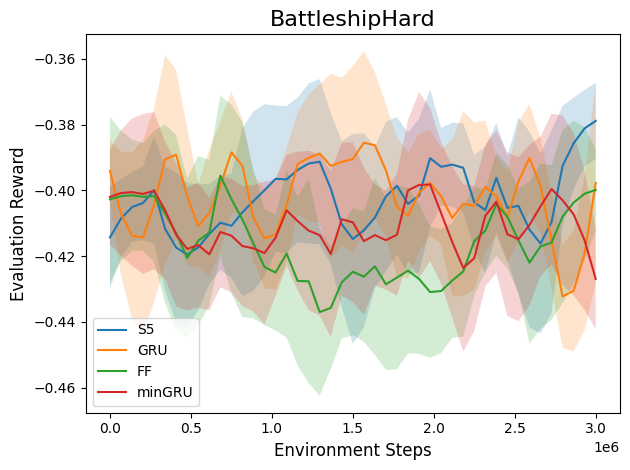

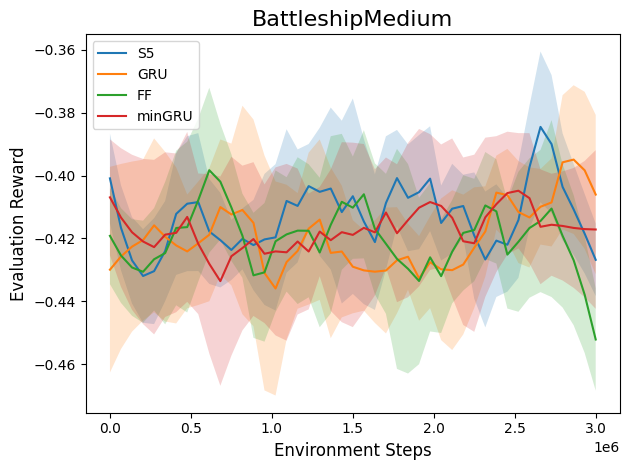

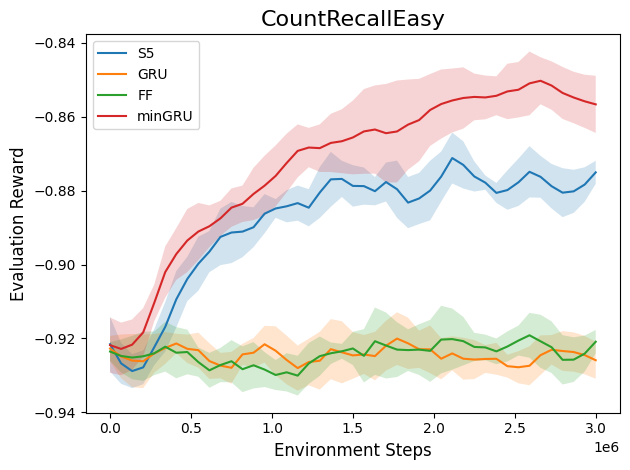

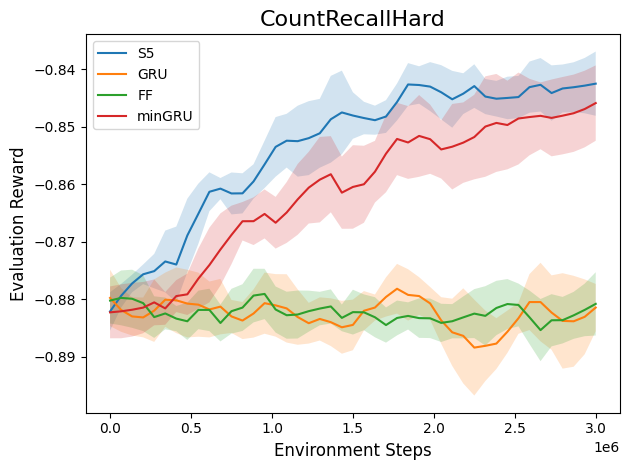

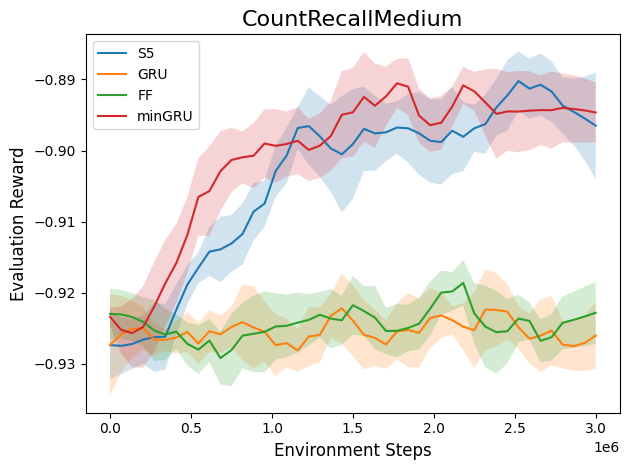

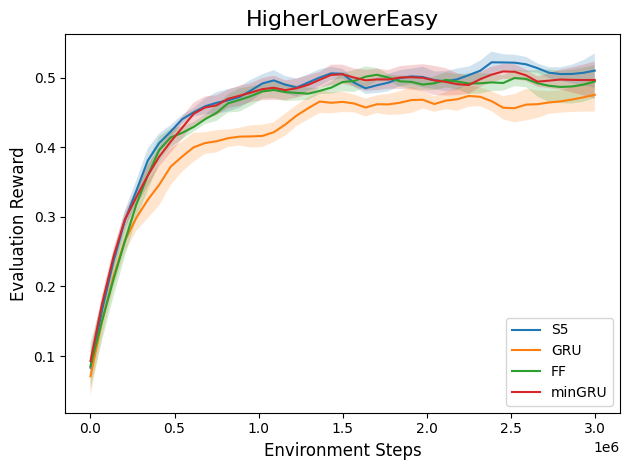

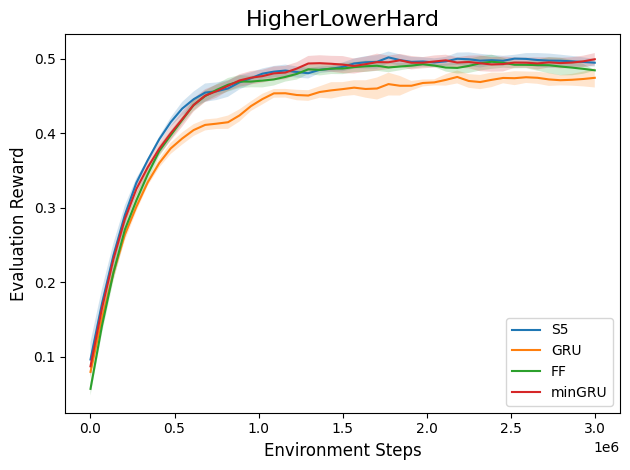

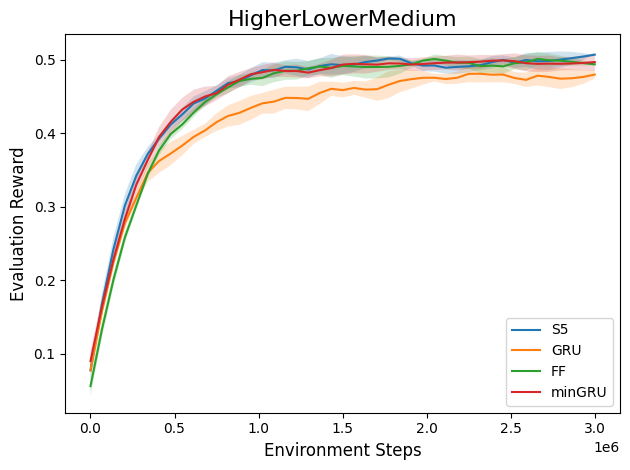

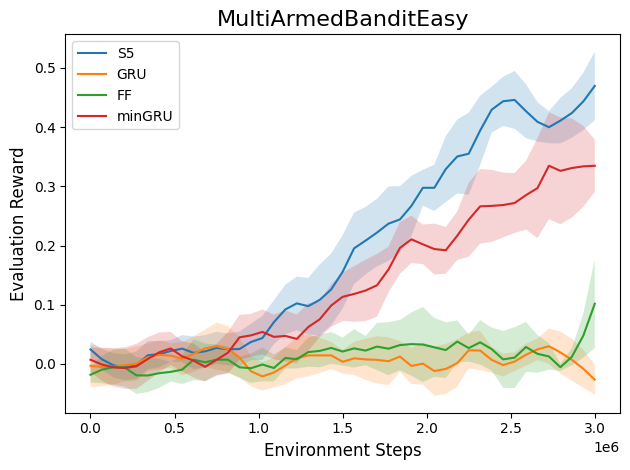

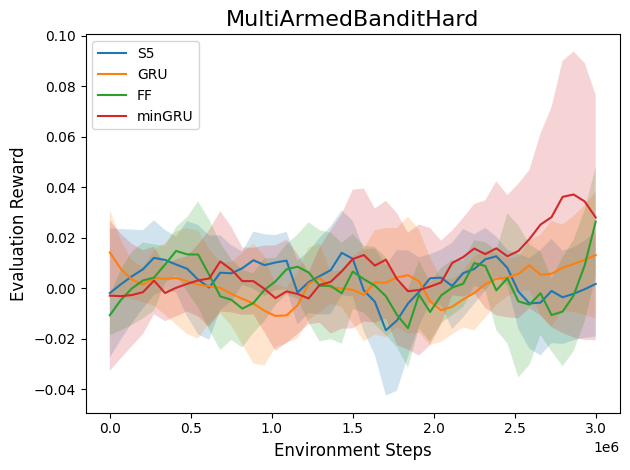

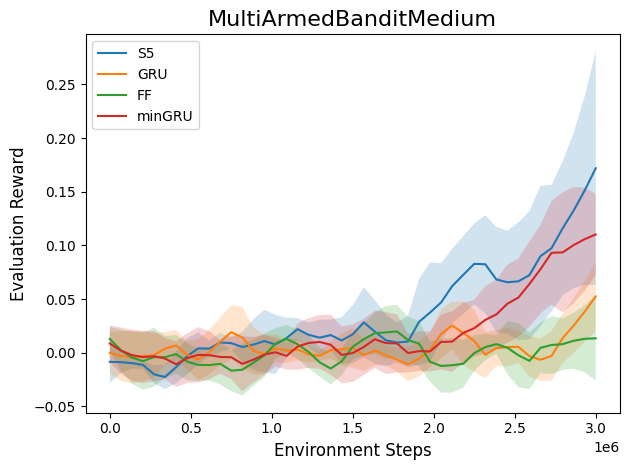

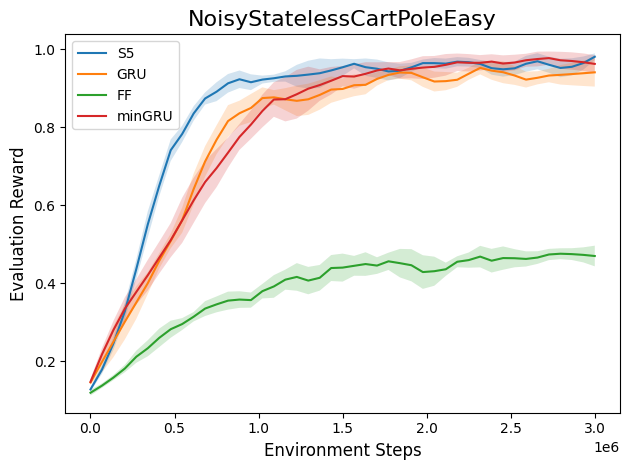

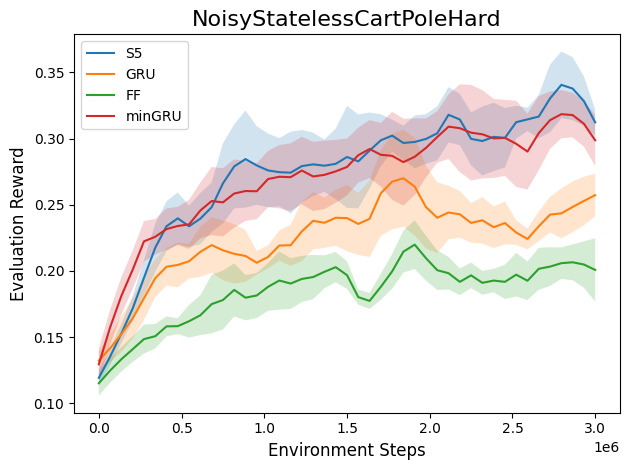

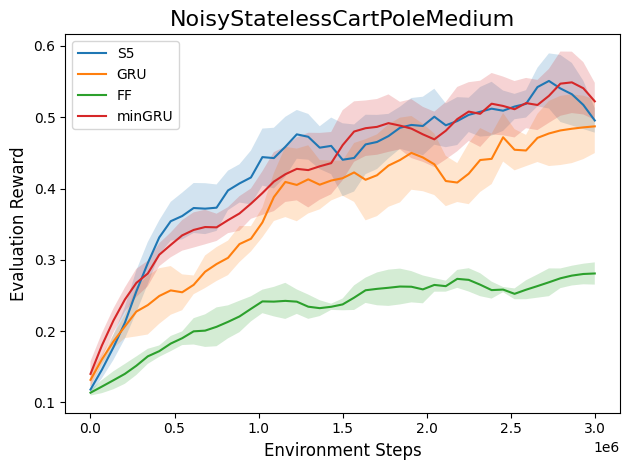

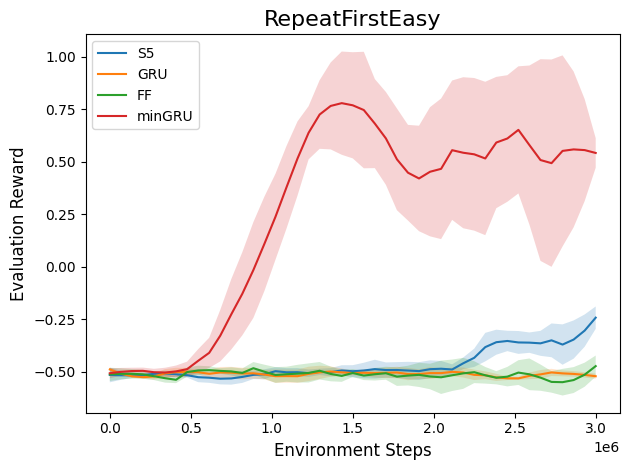

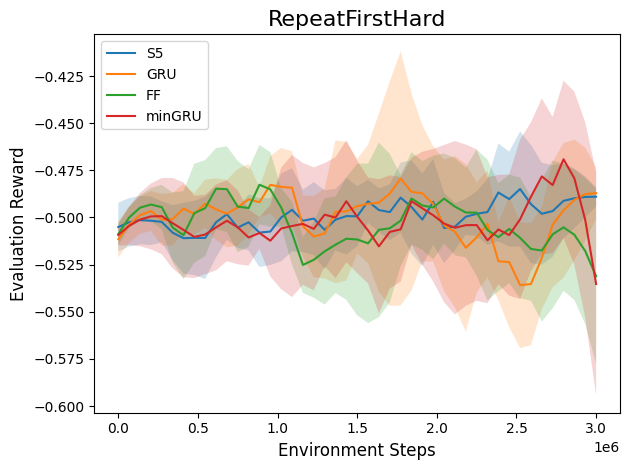

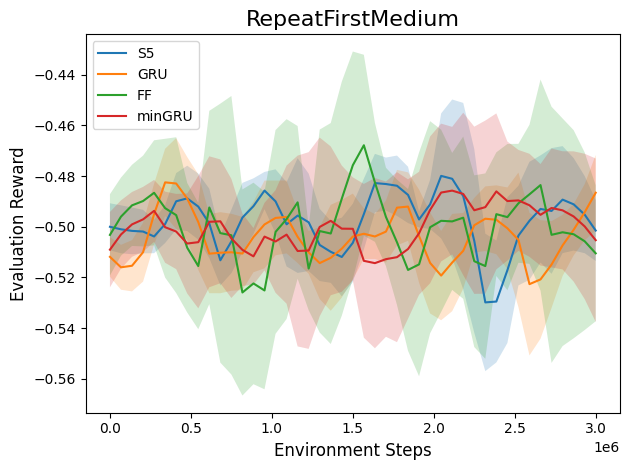

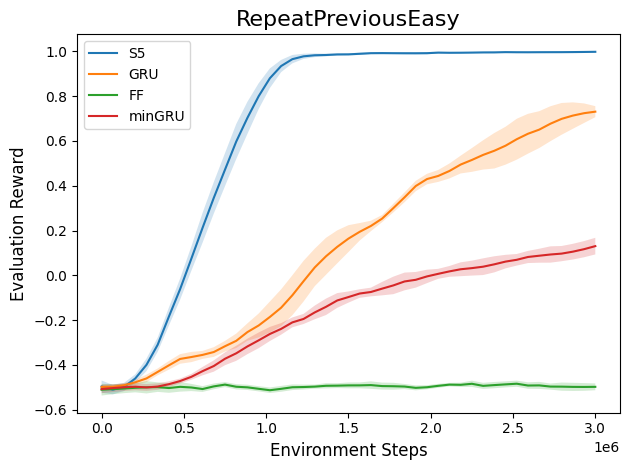

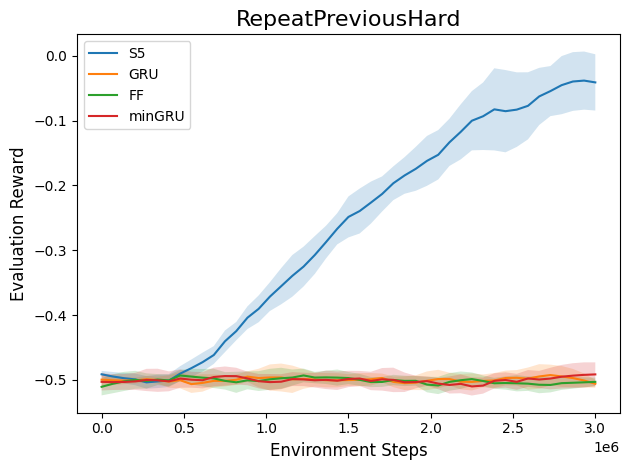

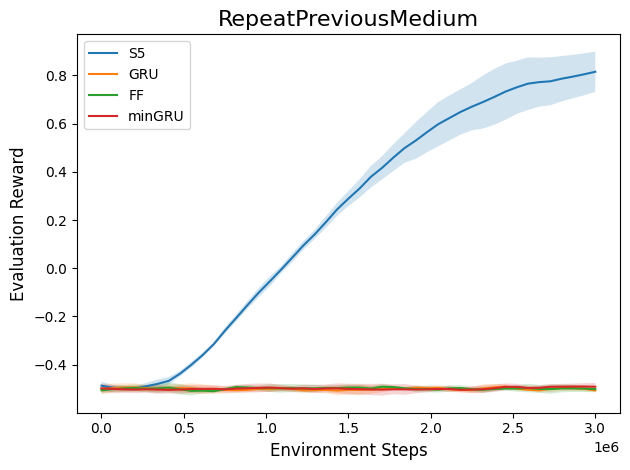

In [55]:
for key in s5_perf_dict.keys():
    
    if key == "ConcentrationEasy": continue
    
    fig, ax = plt.subplots(1,1)

    #S5
    x, y, std = s5_perf_dict[key]
    y = savgol_filter(y, 7, 2)
    std = savgol_filter(std, 7, 2)
    ax.plot(x, y, label="S5")
    ax.fill_between(x, y - std, y + std, alpha=0.2)
    # GRU
    x, y, std = GRU_perf_dict[key]
    y = savgol_filter(y, 7, 2)
    std = savgol_filter(std, 7, 2)
    ax.fill_between(x, y - std, y + std, alpha=0.2)
    ax.plot(x, y, label="GRU")
    # FF
    x, y, std = FF_perf_dict[key]
    y = savgol_filter(y, 7, 2)
    std = savgol_filter(std, 7, 2)
    ax.fill_between(x, y - std, y + std, alpha=0.2)
    ax.plot(x, y, label="FF")

    # minGRU 
    x, y, std = minGRU_perf_dict[key]
    y = savgol_filter(y, 7, 2)
    std = savgol_filter(std, 7, 2)
    ax.fill_between(x, y - std, y + std, alpha=0.2)
    ax.plot(x, y, label="minGRU")

    #
    ax.set_xlabel('Environment Steps', fontsize=12)
    ax.set_ylabel('Evaluation Reward', fontsize=12)
    ax.set_title(key, fontsize=16)

    plt.legend()
    plt.tight_layout()
    plt.show()

# Average over all environments

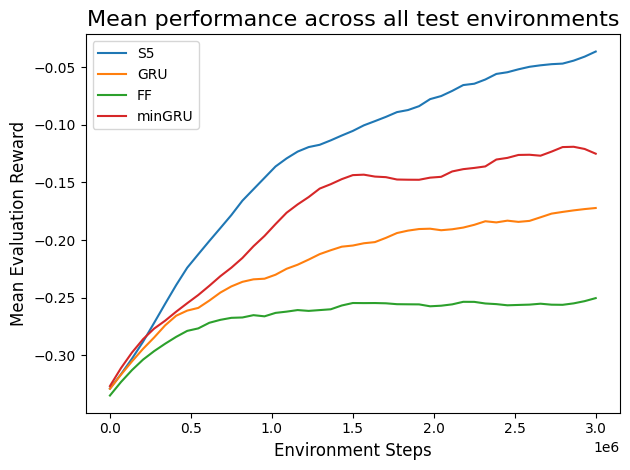

In [57]:
fig, ax = plt.subplots(1,1)
S5_perf = []
GRU_perf = []
FF_perf = []
minGRU_perf = []

for key in s5_perf_dict.keys():
    
    if key == "ConcentrationEasy": continue

    #S5
    x, y, std = s5_perf_dict[key]
    
    S5_perf.append(y)

    # GRU
    x, y, std = GRU_perf_dict[key]
    GRU_perf.append(y)

    # FF
    x, y, std = FF_perf_dict[key]
    FF_perf.append(y)

    ## minGRU
    x, y, std = minGRU_perf_dict[key]
    minGRU_perf.append(y)


# S5
y = np.mean(np.array(S5_perf), axis=0)
std = np.std(np.array(S5_perf), axis=0)
y = savgol_filter(y, 7, 2)
std = savgol_filter(std, 7, 2)
ax.plot(x, y, label="S5")
# ax.fill_between(x, y - std, y + std, alpha=0.2)

y = np.mean(np.array(GRU_perf), axis=0)
std = np.std(np.array(GRU_perf), axis=0)
y = savgol_filter(y, 7, 2)
std = savgol_filter(std, 7, 2)
ax.plot(x, y, label="GRU")
# ax.fill_between(x, y - std, y + std, alpha=0.2)

y = np.mean(np.array(FF_perf), axis=0)
std = np.std(np.array(FF_perf), axis=0)
y = savgol_filter(y, 7, 2)
std = savgol_filter(std, 7, 2)
ax.plot(x, y, label="FF")
# ax.fill_between(x, y - std, y + std, alpha=0.2)

# minGRU
y = np.mean(np.array(minGRU_perf), axis=0)
std = np.std(np.array(minGRU_perf), axis=0)
y = savgol_filter(y, 7, 2)
std = savgol_filter(std, 7, 2)
ax.plot(x, y, label="minGRU")

ax.set_title("Mean performance across all test environments", fontsize=16)
ax.set_xlabel('Environment Steps', fontsize=12)
ax.set_ylabel('Mean Evaluation Reward', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### MMER comparison

0.82118523
0.19484244
0.52815384
0.33121407
0.43681496
0.3004597


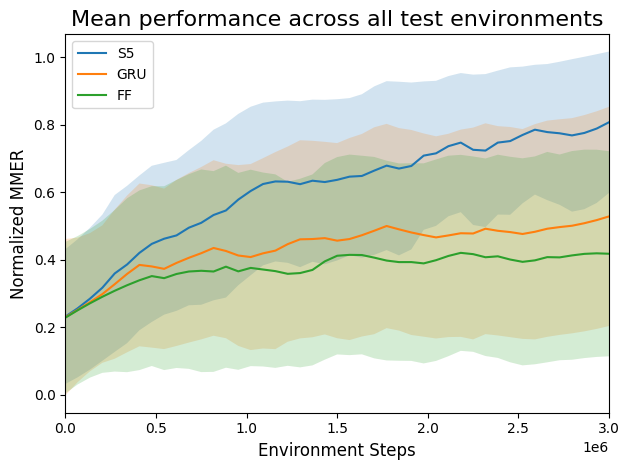

In [ ]:
fig, ax = plt.subplots(1,1)
S5_perf = []
GRU_perf = []
FF_perf = []
minGRU_perf = []

for key in s5_perf_dict.keys():
    
    #S5
    x, y_S5, std_S5 = s5_perf_dict[key]
    

    # GRU
    x, y_GRU, std_GRU = GRU_perf_dict[key]

    # FF
    x, y_FF, std_FF = FF_perf_dict[key]

    # minGRU
    x, y_minGRU, std = minGRU_perf_dict[key]
    minGRU_perf.append(y)

    # Calculate MMER
    max_val = max([max(y_S5), max(y_GRU), max(y_FF), max((y_minGRU))])
    min_val = min([min(y_S5), min(y_GRU), min(y_FF), min(y_minGRU)])

    S5_rescaled = (y_S5 - min_val) / (max_val - min_val)
    GRU_rescaled = (y_GRU - min_val) / (max_val - min_val)
    FF_rescaled = (y_FF - min_val) / (max_val - min_val)
    minGRU_rescaled = (y_minGRU - min_val) / (max_val - min_val)

    S5_perf.append(S5_rescaled)
    FF_perf.append(FF_rescaled)
    GRU_perf.append(GRU_rescaled)
    minGRU_perf.append(minGRU_rescaled)

smoothing_window = 7
# S5
y = np.mean(np.array(S5_perf), axis=0)
std = np.std(np.array(S5_perf), axis=0)
print(max(y))
print(std[np.argmax(y)])
y = savgol_filter(y, smoothing_window, 2)
std = savgol_filter(std, smoothing_window, 2)
ax.plot(x, y, label="S5")
ax.fill_between(x, y - std, y + std, alpha=0.2)


y = np.mean(np.array(GRU_perf), axis=0)
std = np.std(np.array(GRU_perf), axis=0)
print(max(y))
print(std[np.argmax(y)])
y = savgol_filter(y, smoothing_window, 2)
std = savgol_filter(std, smoothing_window, 2)
ax.plot(x, y, label="GRU")
ax.fill_between(x, y - std, y + std, alpha=0.2)

y = np.mean(np.array(FF_perf), axis=0)
std = np.std(np.array(FF_perf), axis=0)
print(max(y))
print(std[np.argmax(y)])
y = savgol_filter(y, smoothing_window, 2)
std = savgol_filter(std, smoothing_window, 2)
ax.plot(x, y, label="FF")
ax.fill_between(x, y - std, y + std, alpha=0.2)

ax.set_title("Mean performance across all test environments", fontsize=16)
ax.set_xlabel('Environment Steps', fontsize=12)
ax.set_ylabel('Normalized MMER', fontsize=12)
ax.set_xlim([0, 3e6])
plt.legend()
plt.tight_layout()
plt.show()

# Runtime analysis

253.3158250490824 5.757253413190638
765.5377342844009 59.1790613286684
25.734168628056846 8.906871597403855


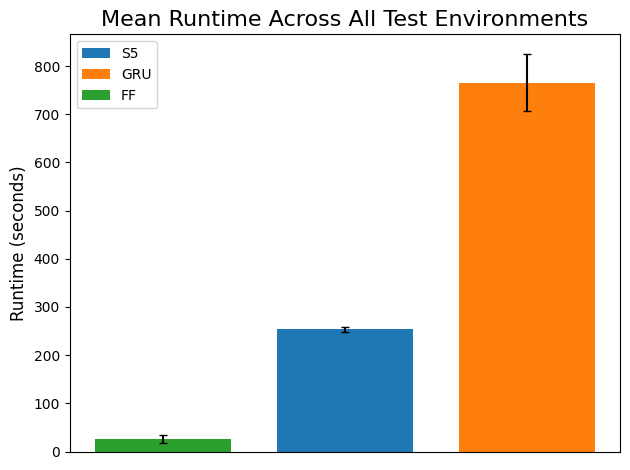

In [ ]:
fig, ax = plt.subplots(1,1)
S5_runtime = []
GRU_runtime = []
FF_runtime = []

for key in s5_runtime_dict.keys():
    
    #S5
    S5_runtime.append(s5_runtime_dict[key])

    # GRU
    GRU_runtime.append(GRU_runtime_dict[key])

    # FF
    FF_runtime.append(FF_runtime_dict[key])

offset = 0.4
width=0.3
# S5
y = np.mean(np.array(S5_runtime), axis=0)
std = np.std(np.array(S5_runtime), axis=0)
print(y, std)
ax.bar(offset, y, width, label="S5")
ax.errorbar(offset, 
            y, 
            yerr=std,
            fmt='-',
            color='black',
            capsize=3,
            mew=1
        )

y = np.mean(np.array(GRU_runtime), axis=0)
std = np.std(np.array(GRU_runtime), axis=0)
print(y, std)
ax.bar(2*offset, y, width, label="GRU")
ax.errorbar(2*offset, 
            y, 
            yerr=std,
            fmt='-',
            color='black',
            capsize=3,
            mew=1
        )

y = np.mean(np.array(FF_runtime), axis=0)
std = np.std(np.array(FF_runtime), axis=0)
print(y, std)
ax.bar(0, y, width, label="FF")
ax.errorbar(0, 
            y, 
            yerr=std,
            fmt='-',
            color='black',
            capsize=3,
            mew=1
        )

ax.set_title("Mean Runtime Across All Test Environments", fontsize=16)
ax.set_xticks([])
ax.set_ylabel("Runtime (seconds)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()